# Linear Regression CaseStudy

# Predicting Medical Insurance costs 

### Many factors that affect how much you pay for health insurance are not within your control. Here are some factors that affect how much health insurance premiums cost

* age : age of primary beneficiary


* sex : insurance contractor gender, female, male


* bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


* children : Number of children covered by health insurance / Number of dependents


* smoker : Smoking


* region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest


* Charges: Individual medical costs billed by health insurance


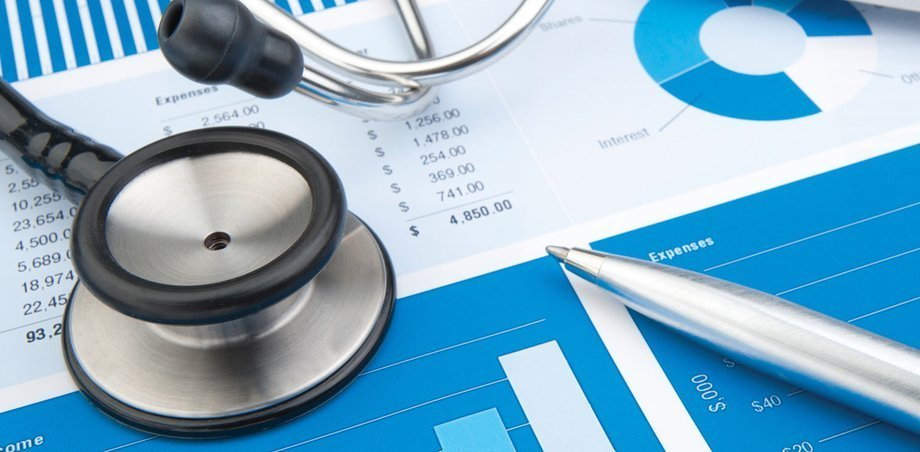

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

### Importing the dataset

In [2]:
os.chdir(r"G:\PYTHON JUPYTER NOTEBOOK")
path_data = os.getcwd()

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# For both numerical and categorical variables
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


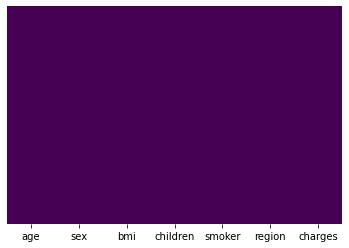

In [10]:
# We have no missing values which is very good. 
print(df.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

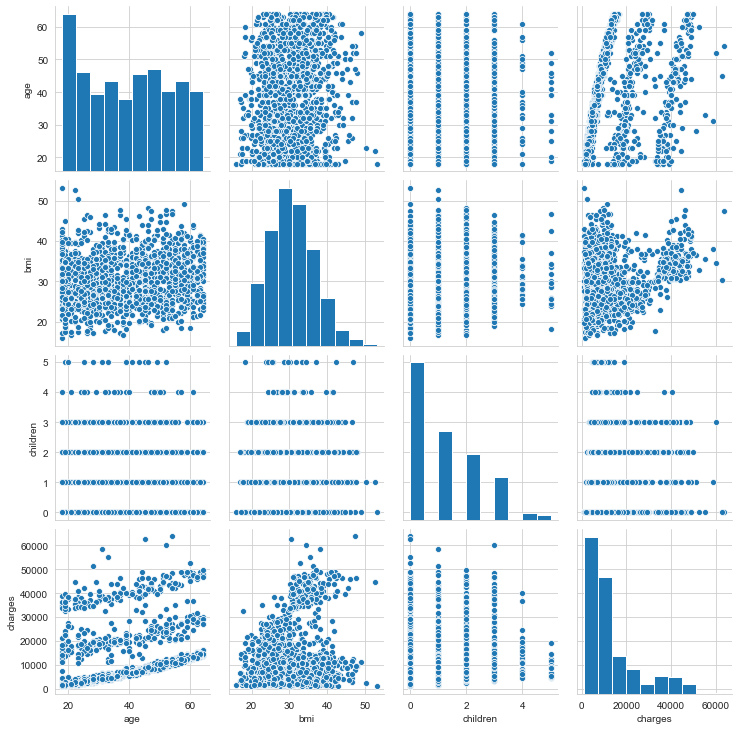

In [11]:
sns.set_style('whitegrid')
sns.pairplot(df)

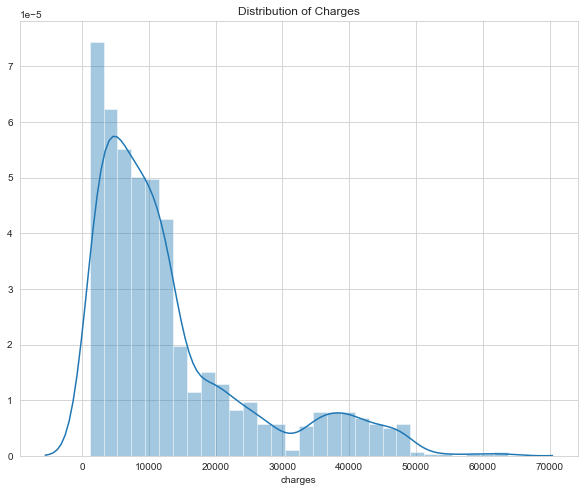

In [12]:
# Density distribution for target variable
plt.figure(figsize=(10,8))
sns.distplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

#### The graph is not a Gaussian distribution. This distribution is right-skewed.

### Outliers Check

#### For Outliers if it is Gaussian Distribution, then we will go be standard deviation

#### If it is not a Gaussian Distribution, we will go by IQR approach

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb2cd2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb2cd970>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb2bff10>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb3f8070>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb3f8370>],
 'means': []}

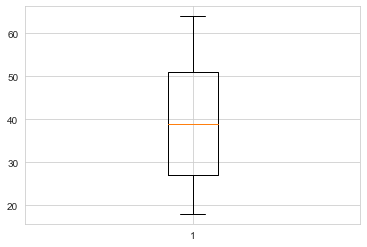

In [13]:
plt.boxplot(df['age'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb440760>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb440e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb440400>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb44b520>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb44b820>],
 'means': []}

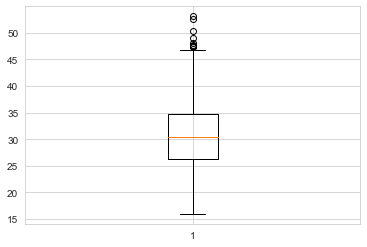

In [14]:
plt.boxplot(df['bmi'])

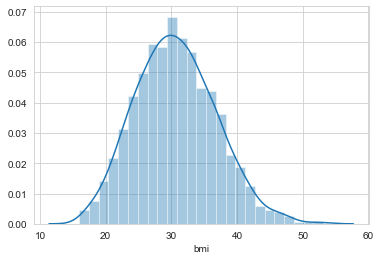

In [15]:
sns.distplot(df['bmi'])

#### The varible Temperature (C) can be seen as gaussian distribution

In [16]:
upper_bound = df['bmi'].mean() + 3*df['bmi'].std()
lower_bound = df['bmi'].mean() - 3*df['bmi'].std()

In [17]:
print(upper_bound)
print(lower_bound)

48.95795759602359
12.368836125949485


{'whiskers': [<matplotlib.lines.Line2D at 0x213fb520e50>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb542550>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb520b50>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb542c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb542f10>],
 'means': []}

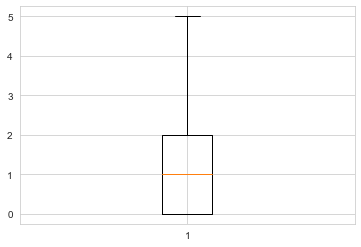

In [18]:
plt.boxplot(df['children'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb570400>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb5983a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb570280>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb598a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb598d60>],
 'means': []}

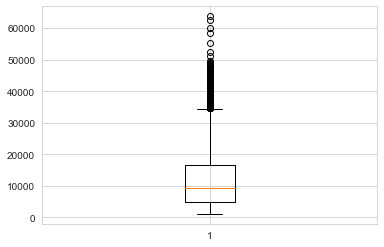

In [19]:
plt.boxplot(df['charges'])

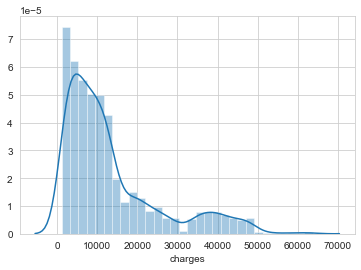

In [20]:
sns.distplot(df['charges'])

#### the variable Humidity is not a gaussian distribution

In [21]:
IQR = df['charges'].quantile(0.75) - df['charges'].quantile(0.25)
print('IQR:',IQR)

IQR: 11899.625365


In [22]:
Upper_bound = df['charges'].quantile(0.75) + (1.5 * IQR)
lower_bound = df['charges'].quantile(0.25) - (1.5 * IQR)

In [23]:
print(Upper_bound)
print(lower_bound)

34489.350562499996
-13109.1508975


### Handling the outliers

In [24]:
df.loc[df["bmi"] > 48.9, "bmi"] = 48.9

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb680c70>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb6a4370>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb680910>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb6a49d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb6a4cd0>],
 'means': []}

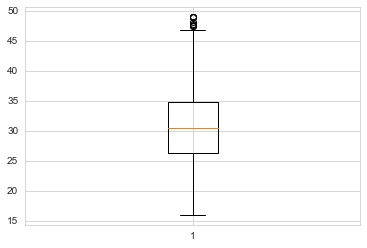

In [25]:
plt.boxplot(df['bmi'])

In [26]:
df.loc[df["charges"] > 34489.3, "charges"] = 34489.3

{'whiskers': [<matplotlib.lines.Line2D at 0x213fb6f0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x213fb6ff310>,
 'boxes': [<matplotlib.lines.Line2D at 0x213fb6f08b0>],
 'medians': [<matplotlib.lines.Line2D at 0x213fb6ff9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213fb6ffcd0>],
 'means': []}

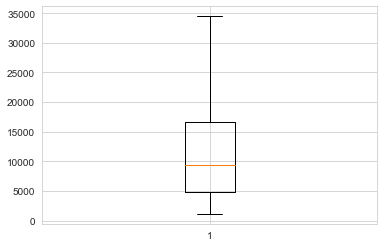

In [27]:
plt.boxplot(df['charges'])

#### Univariate plots

In [28]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

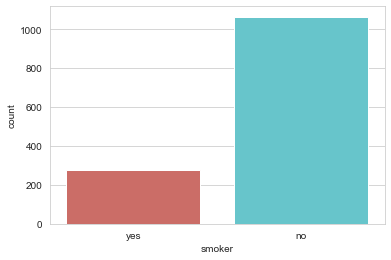

In [29]:
sns.countplot(x ='smoker', data = df, palette = 'hls')

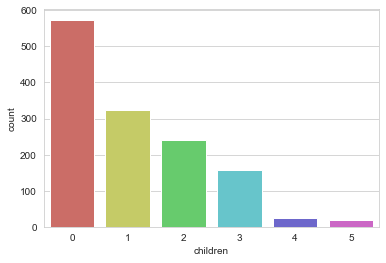

In [30]:
sns.countplot(x ='children', data = df, palette = 'hls')

In [31]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

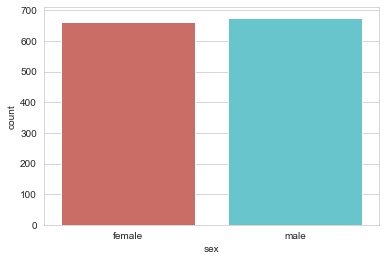

In [32]:
sns.countplot(x ='sex', data = df, palette = 'hls')

In [33]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

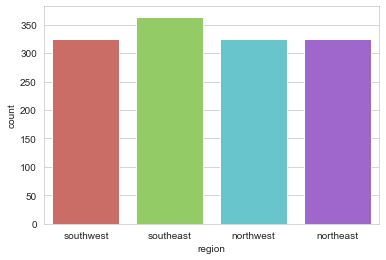

In [34]:
sns.countplot(x ='region', data = df, palette = 'hls')

In [35]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

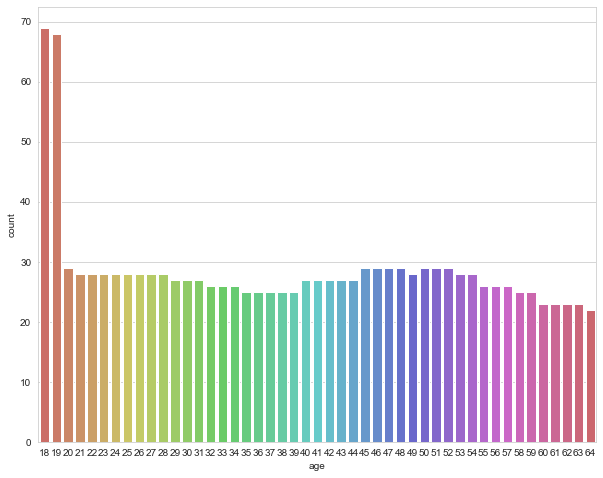

In [36]:
plt.subplots(figsize=(10,8))
sns.countplot(x ='age', data = df, palette = 'hls')

In [37]:
df.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [40]:
# Replacing string values to numbers

df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [41]:
# Now lets look again at the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df.shape

(1338, 7)

### Correlation Matrix

In [44]:
# Correlation Matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.111219,0.042469,-0.025019,-0.002127,0.313394
sex,0.020856,1.000000,-0.045387,-0.017163,-0.076185,0.004588,-0.052322
bmi,0.111219,-0.045387,1.000000,0.013349,0.003239,-0.157659,0.160574
children,0.042469,-0.017163,0.013349,1.000000,0.007673,-0.016569,0.073074
smoker,-0.025019,-0.076185,0.003239,0.007673,1.000000,0.002181,0.785958
region,-0.002127,0.004588,-0.157659,-0.016569,0.002181,1.000000,0.016890
charges,0.313394,-0.052322,0.160574,0.073074,0.785958,0.016890,1.000000


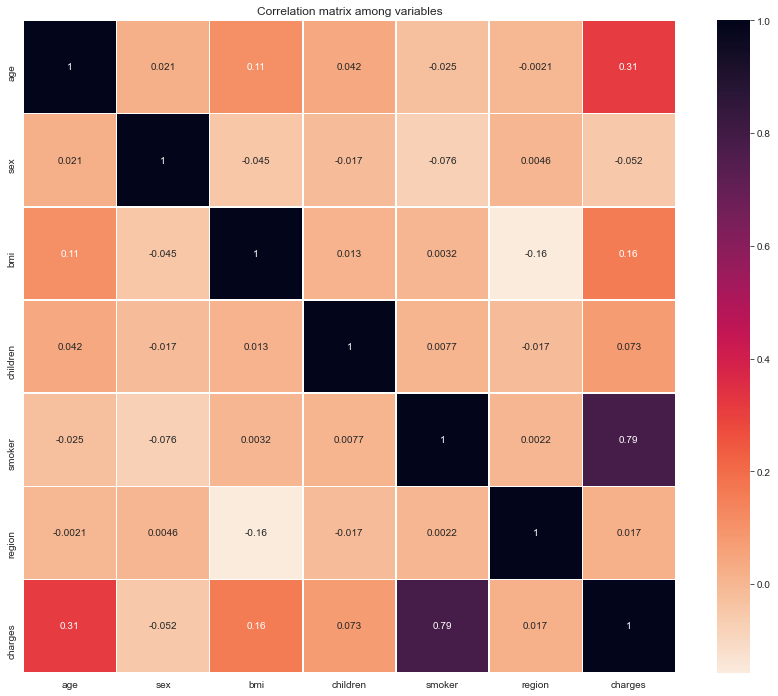

In [45]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, cmap="rocket_r")
plt.title("Correlation matrix among variables")
plt.show()

#### Creating the Independendent and Dependent Data Sets

In [46]:
# Feature or Independent variables
X = df.drop(["charges"],axis = 1)

In [47]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [48]:
# Label or Dependent variable
y = df["charges"]

In [49]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Model Building

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [51]:
X_train.head()

,age,sex,bmi,children,smoker,region
1163,18,1,28.215,0,0,4
196,39,1,32.800,0,0,1
438,52,1,46.750,5,0,2
183,44,1,26.410,0,0,3
1298,33,0,27.455,2,0,3


In [52]:
X_test.head()

,age,sex,bmi,children,smoker,region
578,52,0,30.200,1,0,1
610,47,1,29.370,1,0,2
569,48,0,40.565,2,1,3
1034,61,0,38.380,0,0,3
198,51,1,18.050,0,0,3


In [53]:
y_train.head()

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
Name: charges, dtype: float64

In [54]:
y_test.head()

578      9724.5300
610      8547.6913
569     34489.3000
1034    12950.0712
198      9644.2525
Name: charges, dtype: float64

In [55]:
# Fitting Multiple Linear Regression to the Training set

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction of the Model


In [58]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [59]:
y_pred[0:20]

array([10874.00571856,  9820.87395387, 32851.21386962, 14784.74871836,
        8146.09240919,  5123.21079873,  2486.95667365, 13392.14467708,
        9047.17904272,  7568.37440178,  5976.87574885, 10544.73007913,
        8747.45664964,  5038.43882061, 24500.01755123, 11146.47902764,
       11548.11774063,  6078.88105443,  8369.01793474, 23593.28753694])

#### Plotting the results

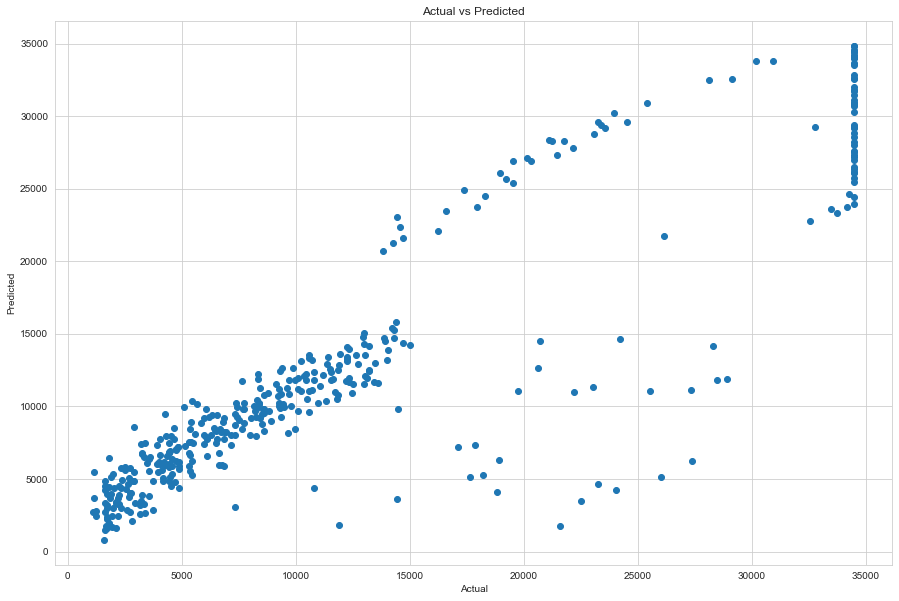

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [61]:
# Interpretation of actual, predicted and their difference 

In [62]:
y_pred_df2 = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_pred, "Difference" : y_test - y_pred}) 

In [63]:
y_pred_df2.head(10)

,Actual value,Predicted value,Difference
578,9724.53000,10874.005719,-1149.475719
610,8547.69130,9820.873954,-1273.182654
569,34489.30000,32851.213870,1638.086130
1034,12950.07120,14784.748718,-1834.677518
198,9644.25250,8146.092409,1498.160091
981,4500.33925,5123.210799,-622.871549
31,2198.18985,2486.956674,-288.766824
1256,11436.73815,13392.144677,-1955.406527
1219,7537.16390,9047.179043,-1510.015143
1320,5425.02335,7568.374402,-2143.351052


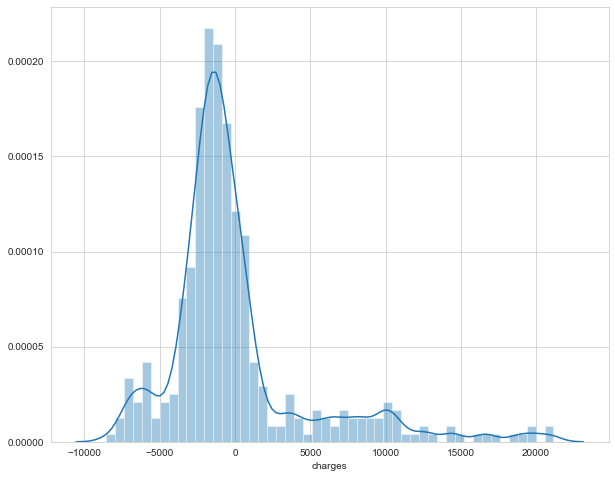

In [64]:
# Now we can see the normally distributed graph 
plt.figure(figsize=(10,8))
sns.distplot((y_test-y_pred),bins=50)
plt.show()

In [65]:
# r-square score on train data
regressor.score(X_train,y_train)

0.7305899577910844

In [66]:
# r-square score on test data
regressor.score(X_test,y_test)

0.7833606782206849

In [67]:
from sklearn import metrics

In [68]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 3181.1674608804665


In [69]:
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 23656471.530708972


In [70]:
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4863.791888096053


### Building a predictive system 

In [83]:
# Predict charges for new customer : Name- Frank
df = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
cust_df = pd.DataFrame(df,index)
cust_df

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [84]:
cust_pred = regressor.predict(cust_df)
print("Medical Insurance cost for customer is : ",cust_pred)

Medical Insurance cost for customer is :  [32961.73773717]


### Model Statistics

In [ ]:
import statsmodels.api as sm

In [ ]:
#Adding Intercept term to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
#Converting into Dataframe
X_train_d = pd.DataFrame(X_train)

In [ ]:
#Printing the Model Statistics
model = sm.OLS(y_train,X_train).fit()
model.summary()

In [ ]:
#Checking the VIF Values

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

In [ ]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [ ]:
coefficients

In [ ]:
# regression intercept
print('Intercept:' ,regressor.intercept_)